# 📌 Problem Statement

- Generate **1000 samples** from a **uniform distribution** over the interval [-1, 1]:

  $$
  x \sim U(-1, 1)
  $$

- Use the **histogram method** to estimate the **probability density function (PDF)** of the distribution based on these samples.

- Choose an appropriate **bin width** $\Delta x$ (or equivalently, determine the number of bins).

- Finally, **plot the histogram estimate** of the PDF to visualize your approximation.



# ✅ Goal

- Understand how to **estimate an unknown distribution** using the **histogram technique** based on sample data.

- Observe how choices like **bin width $\Delta x$** impact the quality and smoothness of the estimated PDF.

---

# ✍️ Notes on Histogram Estimation

- The histogram provides a **non-parametric estimate** of the PDF:

  $$
  \hat{f}(x) = \frac{\text{Number of samples in bin}}{N \times \Delta x}
  $$

  where:
  - $N$ = total number of samples
  - $\Delta x$ = bin width (size of each interval)

- The histogram plot should approximate the **true PDF**, which for a uniform distribution over [-1, 1] is:

  $$
  f(x) = 
  \begin{cases}
  0.5, & -1 < x < 1 \\
  0, & \text{otherwise}
  \end{cases}
  $$

---

# 🚀 Visualization

- The histogram allows you to visually compare the **empirical distribution** (from your samples) to the **theoretical uniform distribution**.

- By adjusting $\Delta x$, you control the balance between:
  - **Variance** (too small $\Delta x$ → noisy estimate),
  - **Bias** (too large $\Delta x$ → oversmooth estimate).

---


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
n_samples = 1000
x = np.random.uniform(-1, 1, n_samples)

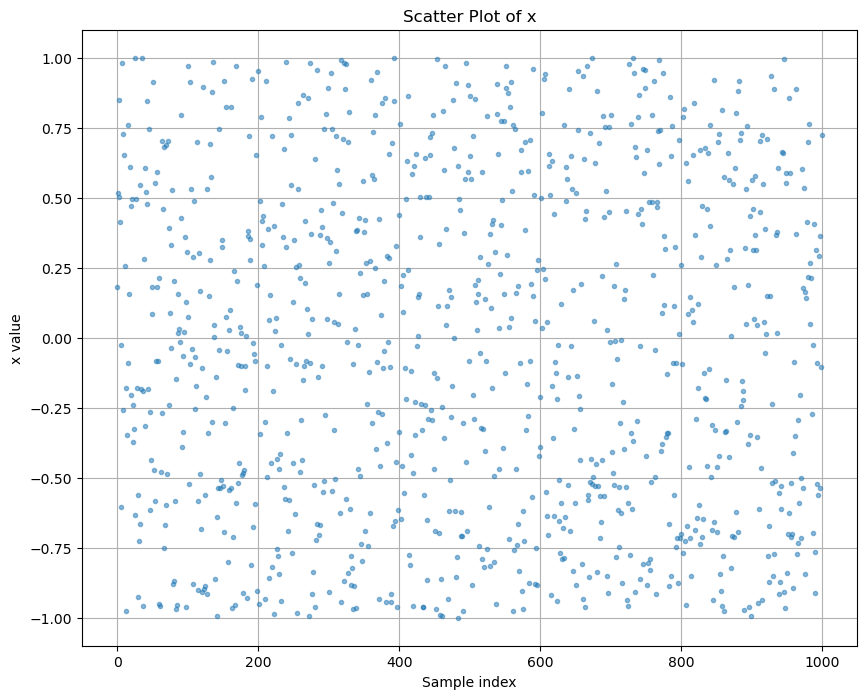

In [7]:
plt.figure(figsize=(10, 8))
plt.plot(x, '.', alpha=0.5)
plt.title('Scatter Plot of x')
plt.xlabel('Sample index')
plt.ylabel('x value')
plt.grid(True)
plt.show()

In [35]:
num_bins = int(np.sqrt(n_samples))
delta_x = 2 / num_bins

# counts, bin_edges = np.histogram(x, bins=num_bins, range=(-1, 1))

bin_edges = np.linspace(-1, 1, num=(num_bins + 1))

In [36]:
counts = np.zeros(num_bins)

for value in x:
    for i in range(num_bins):
        if bin_edges[i] <= value < bin_edges[i+1]:
            counts[i] +=1
            break

    if value == bin_edges[-1]:
        counts[-1] += 1

In [37]:
pdf_estimates = counts / (n_samples * delta_x)

In [38]:
bin_center = [0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(num_bins)]
print(f"Lenght of bin_center: {len(bin_center)}")

Lenght of bin_center: 31


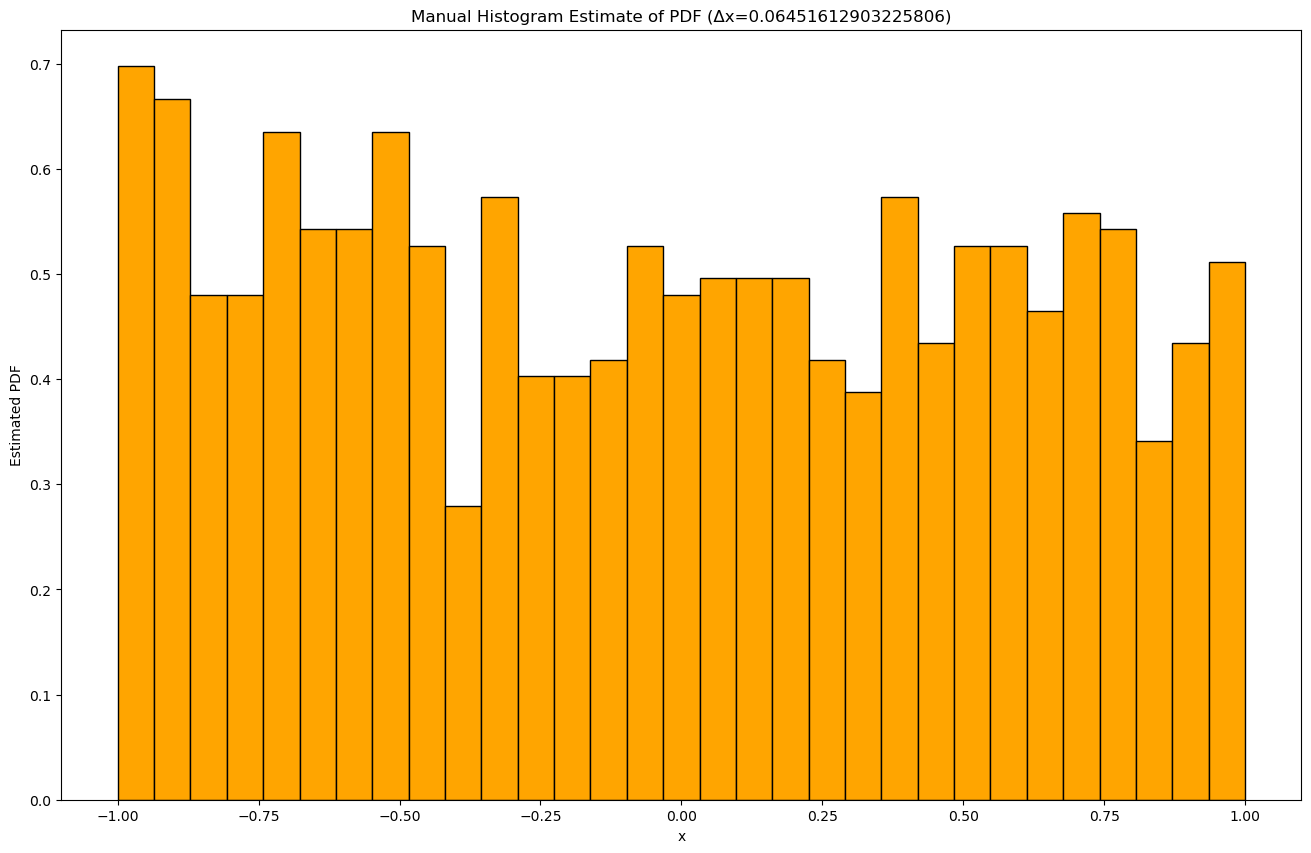

In [39]:
plt.figure(figsize=(16, 10))
plt.bar(bin_center, pdf_estimates, width=delta_x, color='orange', edgecolor='black')
plt.title(f"Manual Histogram Estimate of PDF (Δx={delta_x})")
plt.xlabel("x")
plt.ylabel("Estimated PDF")
plt.grid(False)
plt.show()